['coast', 'forest', 'highway', 'insidecity', 'mountain', 'opencountry', 'street', 'tallbuilding']
['Artificial', 'Natural']
2688 2688


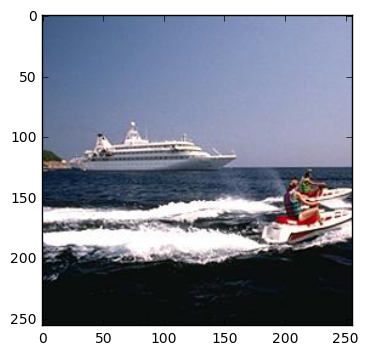

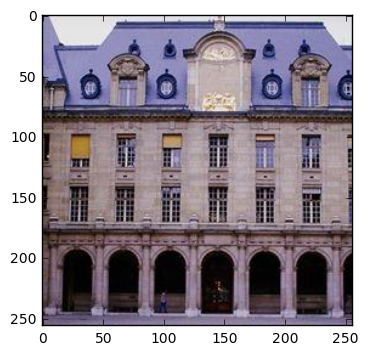

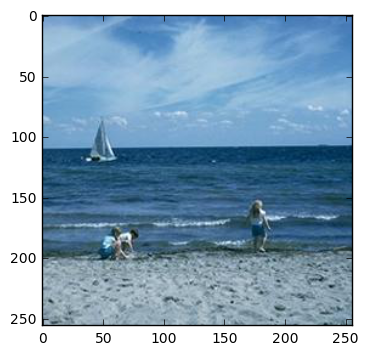

0

In [1]:
from dataset import Dataset
scene8 = Dataset('8Scenes/')
artnat = Dataset('ArtificialNatural/')

print scene8.getClasses()
print artnat.getClasses()

print scene8.getLength(),artnat.getLength() #i dataset contengono le stesse immagini

scene8.showImage('coast',0)
scene8.showImage('insidecity',10)
artnat.showImage('Natural',12)

In [2]:
import cPickle

with open('8scenes_features.npy') as f:
    data_8scenes = cPickle.load(f)
with open('ArtificialNatural_features.npy') as f:
    data_ArtificialNatural = cPickle.load(f)

X1_train = data_ArtificialNatural['X_train'] #feature di training
X1_test = data_ArtificialNatural['X_test'] #feature di test
y1_train = data_ArtificialNatural['y_train'] #etichette di training (sono indici numerici 0,1)
y1_test = data_ArtificialNatural['y_test'] #etichette di test
classes1 = data_ArtificialNatural['classes'] #stringhe corrispondenti alle classi: classes1[0] è 
                                             #'Artificial', classes1[1] è 'Natural'

X2_train = data_8scenes['X_train']
X2_test = data_8scenes['X_test']
y2_train = data_8scenes['y_train'] #etichette di training (sono indici numerici che vanno da 0 a 7)
y2_test = data_8scenes['y_test']
classes2 = data_8scenes['classes'] #stringhe corrispondenti alle classi: classes2[i] è il nome 
                                   #della classe corrispondente alla classe il cui indice è "i"

print X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape
print X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

(1881, 500) (1881,) (807, 500) (807,)
(270, 500) (270,) (268, 500) (268,)


# Domanda 4.1
Qual è l'accuracy relativa alla matrice di confusione riportata sopra? (Cani e Gatti)

acc = (30+27)/(27+6+5+30)=0.838

In [3]:
import numpy as np
y=np.array([1,1,1,1,1,0,0,0,0,0,1,1,0,0,2,2,2,2]) #vettore d'esempio di etichette di ground truth e predette
p=np.array([1,0,1,1,1,0,0,2,0,1,1,1,0,0,1,2,0,2])

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix
print "Confusion Matrix:\n", confusion_matrix(y,p)
print "Accuracy: %0.2f" % accuracy_score(y,p)

Confusion Matrix:
[[5 1 1]
 [1 6 0]
 [1 1 2]]
Accuracy: 0.72


In [5]:
from sklearn.neighbors import KDTree
tree = KDTree(X2_train)

In [6]:
query_feature=X2_test[2].reshape(1,-1) #l'operazione di reshape è necessaria per evitare warning da sklearn
idx=tree.query(query_feature)[1][0][0] #recuperiamo l'indice dell'elemento più vicino

In [7]:
predicted=y2_test[idx]

In [8]:
print predicted,y2_train[2]

0 0


In [9]:
idxs=tree.query(query_feature,5)[1][0]
neighbors_labels=y2_train[idxs]
print neighbors_labels

[0 0 3 0 0]


In [10]:
from scipy.stats import mode
predicted=mode(neighbors_labels).mode[0]
print predicted

0


In [11]:
from sklearn.neighbors import KNeighborsClassifier as KNN
nn5 = KNN(5)
nn5.fit(X2_train,y2_train)
predicted_labels=nn5.predict(X2_test)
a = accuracy_score(y2_test,predicted_labels)
M = confusion_matrix(y2_test,predicted_labels)

print "5-NN, accuracy: %0.3f, Confusion Matrix:\n" %a
print M

5-NN, accuracy: 0.627, Confusion Matrix:

[[26  0  2  0  2  5  0  1]
 [ 0 31  0  0  0  1  1  0]
 [10  0 11  1  2  2  0  0]
 [ 3  1  1 21  0  2  3  0]
 [ 4  4  3  1 17  6  2  0]
 [11  8  4  1  2 15  0  0]
 [ 2  3  3  3  1  0 17  0]
 [ 0  0  0  1  1  1  2 30]]


# Esercizio 5.1 
Costruire e valutare un classificatore 1-NN e un classificatore 3-NN. Quale classificatore funziona meglio? Quale peggio? Perché?

In [12]:
#classificatore 1-NN
nn1 = KNN(1)
nn1.fit(X2_train,y2_train)
predicted_labels=nn1.predict(X2_test)
a = accuracy_score(y2_test,predicted_labels)

print "1-NN, accuracy: %0.3f, Confusion Matrix:\n" %a
# calssificatore 3-NN
nn3 = KNN(3)
nn3.fit(X2_train,y2_train)
predicted_labels=nn3.predict(X2_test)
a = accuracy_score(y2_test,predicted_labels)

print "3-NN, accuracy: %0.3f, Confusion Matrix:\n" %a

1-NN, accuracy: 0.601, Confusion Matrix:

3-NN, accuracy: 0.634, Confusion Matrix:



# Esercizio 5.2 
Costruire e valutare un classificatore K-NN utilizzando il dataset ArtificialNatural. Il classificatore così costruito funziona meglio o peggio rispetto a quelli costruiti utilizzando il dataset 8Scenes? Perché?

In [13]:
#classificatore 1-NN
nn1 = KNN(1)
nn1.fit(X1_train,y1_train)
predicted_labels=nn1.predict(X1_test)
a = accuracy_score(y1_test,predicted_labels)

print "1-NN, accuracy: %0.3f, Confusion Matrix:\n" %a
# calssificatore 3-NN
nn3 = KNN(3)
nn3.fit(X1_train,y1_train)
predicted_labels=nn3.predict(X1_test)
a = accuracy_score(y1_test,predicted_labels)

print "3-NN, accuracy: %0.3f, Confusion Matrix:\n" %a

# il classificatore con il K-NN tra due classi è piu performante di quello ad 8

1-NN, accuracy: 0.902, Confusion Matrix:

3-NN, accuracy: 0.913, Confusion Matrix:



# 6.1

In [14]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X1_train)
X1_train_pca=pca.transform(X1_train)
X1_test_pca=pca.transform(X1_test)

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X1_train_pca,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
new_feature=X1_test_pca[0].reshape(1,-1)
predicted_label = lr.predict(new_feature)[0]
gt_label = y1_test[0]

print predicted_label,gt_label

1 1


In [17]:
theta_0 = lr.intercept_
theta_1_n = lr.coef_

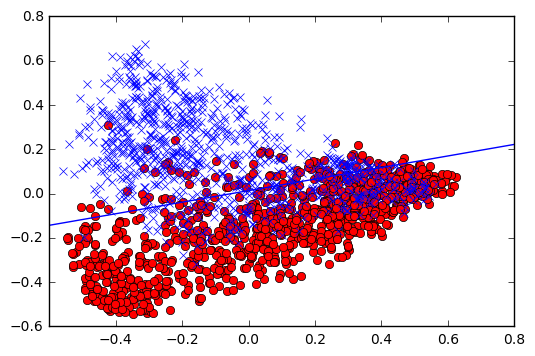

In [18]:
import matplotlib.pyplot as plt

xs = X1_train_pca[:,0]
ys = X1_train_pca[:,1]

plt.figure()
plt.plot(xs[y1_train==0],ys[y1_train==0],'or')
plt.plot(xs[y1_train==1],ys[y1_train==1],'xb')

theta_1=theta_1_n[0][0]
theta_2=theta_1_n[0][1]
x=np.array([-0.6,0.8])
y=-(theta_0+theta_1*x)/(theta_2)

plt.plot(x,y)

plt.xlim(x)
plt.show()

# Domanda 6.1 
Come appare il decision boundary rispetto ai dati? Li “separa” bene? Quanto errore si direbbe che stiamo commettendo (tanto, poco)?

In [19]:
#Il decision boundary sembra separarli bene anche se commette un certo errore nella parte destra del grafico 
#che sembra notevole

<IPython.core.display.Javascript object>


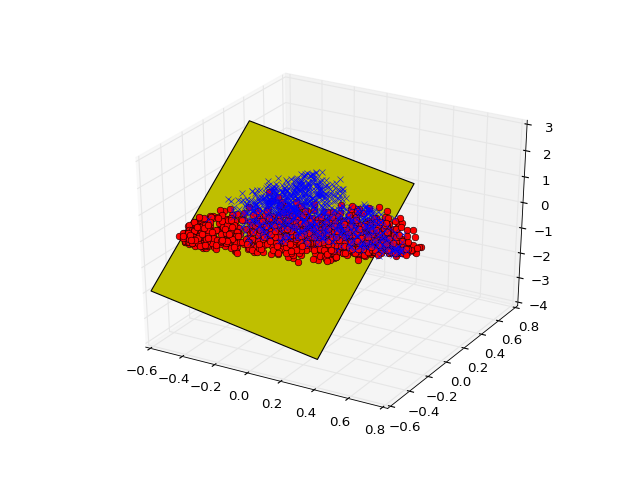

In [20]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.subplot(111, projection='3d')

zs=X1_train_pca[:,2]

plt.plot(xs[y1_train==0],ys[y1_train==0],zs[y1_train==0],'ro')
plt.plot(xs[y1_train==1],ys[y1_train==1],zs[y1_train==1],'bx')

theta_3=theta_1_n[0][2]

x=np.arange(-0.6,0.8)
y=np.arange(-0.6,0.8)
x,y=np.meshgrid(x,y)

z=-(theta_0+theta_1*x+theta_2*y)/theta_3

plt.gca().plot_surface(x,y,z,shade=False,color='y')
plt.show()

# Domanda 6.2 
Come appare il decision boundary rispetto ai dati nel caso 3D? Li “separa” bene? (tanto, poco)?

Il decision boundary in 3D sembra separare meglio i campioni anche se vi continuano ad essere degli errori notevili nella frontiera

# Domanda 6.3 
Quale dei due decision boundary sembra separare “meglio” i dati? Perché?

Quello in 3D in quanto riesce a tener conto di una dimensione in più e ha più feature sulle quali basarsi 

# Esercizio 6.1 
Visualizzare la retta di decisione e il piano di decisione sui dati di test invece che su quelli di training (attenzione, il piano o retta di decisione vanno sempre appresi sul training set!). Il piano o retta di decisione separa i dati "altrettanto bene"?

<IPython.core.display.Javascript object>


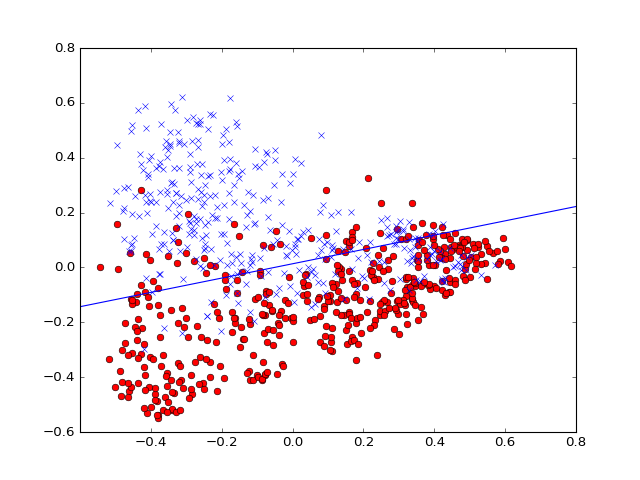

In [21]:
xs = X1_test_pca[:,0]
ys = X1_test_pca[:,1]

plt.figure()
plt.plot(xs[y1_test==0],ys[y1_test==0],'or')
plt.plot(xs[y1_test==1],ys[y1_test==1],'xb')

theta_1=theta_1_n[0][0]
theta_2=theta_1_n[0][1]
x=np.array([-0.6,0.8])
y=-(theta_0+theta_1*x)/(theta_2)

plt.plot(x,y)

plt.xlim(x)
plt.show()

<IPython.core.display.Javascript object>


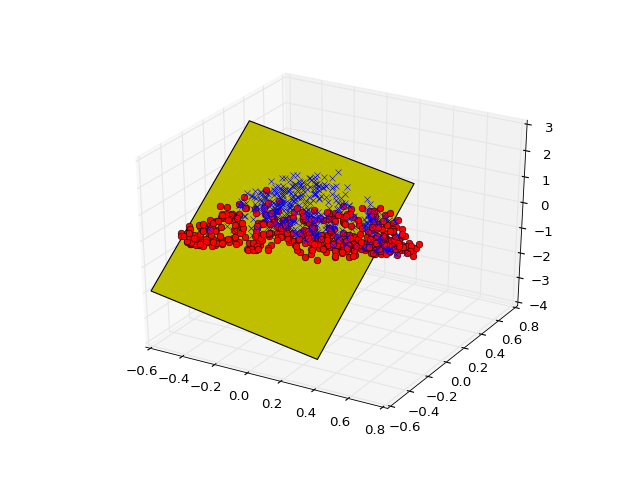

In [22]:
fig = plt.figure()
plt.subplot(111, projection='3d')

zs=X1_test_pca[:,2]

plt.plot(xs[y1_test==0],ys[y1_test==0],zs[y1_test==0],'ro')
plt.plot(xs[y1_test==1],ys[y1_test==1],zs[y1_test==1],'bx')

theta_3=theta_1_n[0][2]

x=np.arange(-0.6,0.8)
y=np.arange(-0.6,0.8)
x,y=np.meshgrid(x,y)

z=-(theta_0+theta_1*x+theta_2*y)/theta_3

plt.gca().plot_surface(x,y,z,shade=False,color='y')
plt.show()

In [23]:
p_test = lr.predict(X1_test_pca)
print "Accuracy: %0.2f, Confusion Matrix:\n" % accuracy_score(y1_test,p_test)
print confusion_matrix(y1_test,p_test)

Accuracy: 0.94, Confusion Matrix:

[[428  14]
 [ 38 327]]


In [24]:
print "Accuracy: %0.2f" % lr.score(X1_test_pca,y1_test)

Accuracy: 0.94


# 6.2 Regressore Logistico Lineare Multinomiale

In [25]:
pca=PCA()
pca.fit(X2_train)
X2_train_pca=pca.transform(X2_train)
X2_test_pca=pca.transform(X2_test)

In [26]:
lr = LogisticRegression() #il regressore utilizzerà il metodo "one-vs-rest" di default

lr.fit(X2_train_pca,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
p=lr.predict(X2_test_pca)
print "Accuracy: %0.3f, Confusion Matrix:\n" % accuracy_score(y2_test,p)
print confusion_matrix(y2_test,p)

Accuracy: 0.713, Confusion Matrix:

[[29  0  0  0  2  4  0  1]
 [ 0 31  0  0  0  0  2  0]
 [10  0 10  1  3  2  0  0]
 [ 2  0  0 25  1  1  0  2]
 [ 4  1  0  0 23  6  1  2]
 [ 6  5  2  0  4 22  1  1]
 [ 0  0  1  2  1  2 19  4]
 [ 0  0  0  3  0  0  0 32]]


# Domanda 6.4 
Il classificatore appena allenato, funziona "meglio" o "peggio" di quello allenato nel caso binario? Perché?

Come aspettato il classificatore ad 8 classi funziona peggio in quanto ha un minor numero di campioni e un confusion matrix di dimensioni maggiori

# Esercizio 6.2 
Facendo riferimento alla documentazione, costruire un regressore logistico di tipo multinomiale (softmax) mediante scikit-learn.

In [28]:
lr_multi = LogisticRegression(multi_class="multinomial",solver="newton-cg") #il regressore utilizzerà il metodo "one-vs-rest" di default

lr_multi.fit(X2_train_pca,y2_train)
p=lr_multi.predict(X2_test_pca)
print "Accuracy: %0.3f, Confusion Matrix:\n" % accuracy_score(y2_test,p)
print confusion_matrix(y2_test,p)

Accuracy: 0.713, Confusion Matrix:

[[26  0  1  0  2  6  0  1]
 [ 0 31  0  0  0  0  2  0]
 [10  0 11  0  3  2  0  0]
 [ 2  0  0 25  1  1  0  2]
 [ 3  1  0  0 23  7  1  2]
 [ 5  2  2  0  6 25  1  0]
 [ 0  0  1  2  1  2 19  4]
 [ 0  0  0  4  0  0  0 31]]


# 7. Classificatore di Tipo Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB as NB

nb = NB()

In [30]:
nb.fit(X2_train,y2_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
predicted_labels=nb.predict(X2_test)

print "Accuracy: %0.2f, Confusion Matrix:\n" % accuracy_score(y2_test,predicted_labels)
print confusion_matrix(y2_test,predicted_labels)

Accuracy: 0.65, Confusion Matrix:

[[29  0  0  0  1  6  0  0]
 [ 0 31  0  0  0  1  1  0]
 [19  0  3  0  2  2  0  0]
 [ 1  6  0 15  0  7  0  2]
 [ 2  3  0  0 18 10  1  3]
 [ 6  7  0  0  1 27  0  0]
 [ 0  3  0  3  0  3 17  3]
 [ 0  0  0  0  0  0  0 35]]


# Domanda 7.1 
Come funziona il classificatore appena allenato? Funziona meglio o peggio del corrispondente classificatore logistico multinomiale? Ci sono classi per cui l'uno funziona meglio dell'altro?

In [32]:
print confusion_matrix(y2_test,p) - confusion_matrix(y2_test,predicted_labels)
#gli elementi lungo la diagonale principale mi dicono quale dei due funziona emglio
#se l'elemento è positivo il multinomiale è migliore, altrimenti è migliore il bayes

[[-3  0  1  0  1  0  0  1]
 [ 0  0  0  0  0 -1  1  0]
 [-9  0  8  0  1  0  0  0]
 [ 1 -6  0 10  1 -6  0  0]
 [ 1 -2  0  0  5 -3  0 -1]
 [-1 -5  2  0  5 -2  1  0]
 [ 0 -3  1 -1  1 -1  2  1]
 [ 0  0  0  4  0  0  0 -4]]


# Esercizio 8.1 /8.2
Scrivere il codice per allenare e valutare i seguenti classificatori sul dataset relativo alle scene artificiali e naturali / delle 8 scene:

1-NN;

3-NN;

5-NN;

Logistic Regressor;

Multinomial Naive Bayes;

Inserire i valori di accuracy così ottenuti in una tabella comparativa.

In [61]:
models = {}
accuracy_A = []
accuracy_8 = []

models['KN1']=KNN(1)
models['KN3']=KNN(3)
models['KN5']=KNN(5)
models['Naive Bayes']=NB()
models['Logistic Regression']= LogisticRegression()
models['Logistic Regression (mult)']=LogisticRegression(multi_class="multinomial",solver="newton-cg")

print("***Accuracy by model for ArtificialNatural***")
for model in models.values():
    model.fit(X1_train,y1_train)
    accuracy_A.append(accuracy_score(y1_test,model.predict(X1_test)))

for model_name,model_accuracy in zip(models.keys(),accuracy_A):
    print ("Name:{:<30} - Accuracy{}".format(model_name,model_accuracy))
    
print("***Accuracy by model for 8Scenes***")
for model in models.values():
    model.fit(X2_train,y2_train)
    accuracy_8.append(accuracy_score(y2_test,model.predict(X2_test)))

for model_name,model_accuracy in zip(models.keys(),accuracy_8):
    print ("Name:{:<30} - Accuracy{}".format(model_name,model_accuracy))

***Accuracy by model for ArtificialNatural***
Name:Naive Bayes                    - Accuracy0.83395291202
Name:Logistic Regression (mult)     - Accuracy0.94175960347
Name:Logistic Regression            - Accuracy0.935563816605
Name:KN5                            - Accuracy0.910780669145
Name:KN3                            - Accuracy0.913258983891
Name:KN1                            - Accuracy0.902106567534
***Accuracy by model for 8Scenes***
Name:Naive Bayes                    - Accuracy0.652985074627
Name:Logistic Regression (mult)     - Accuracy0.712686567164
Name:Logistic Regression            - Accuracy0.720149253731
Name:KN5                            - Accuracy0.626865671642
Name:KN3                            - Accuracy0.634328358209
Name:KN1                            - Accuracy0.600746268657
